# Data Wrangling

In this project, I will be looking at COVID information from Mexico to predict high risk patients and then find where the best locations to send supplies. 

This data was found on Kaggle and originates from the Mexican Government General Directorate of Epidemiology

(https://www.kaggle.com/datasets/marianarfranklin/mexico-covid19-clinical-data)

(https://www.gob.mx/salud/documentos/datos-abiertos-152127)

The data is mostly made up of categorical data, but also includes date-time data and location data.


Below is an explanation of each feature along with how these will be preprocessed to allow for better analysis and model building.


'FECHA_ACTUALIZACION' : 'Updated Date'


- Database is updated daily, so this shows the most date of the most recent update

'ID_REGISTRO' : 'Registration ID'

- Case Identifier Number


'ORIGEN' : 'Origin'

'SECTOR' : 'Sector'     

- Type of institution that is providing care

'ENTIDAD_UM' : 'Entity'

- Entity or State 

'SEXO' : 'Sex'

- Sex of the Patient 
- 1 is Female : 2 is Male

'ENTIDAD_NAC' : 'Birth Entity'

'ENTIDAD_RES' : 'Residence Entity' 

'MUNICIPIO_RES' : 'Residence Municipality'

'TIPO_PACIENTE' : 'Patient Type'
- 1 if the patient was sent home (outpatient)
- 2 if patient was admitted to the hospital (hospitalized)
- 99 is unspecified 

'FECHA_INGRESO' : 'Date Entry'    
- Date of admission

'FECHA_SINTOMAS' : 'Date Symptoms'
- Date which patients symptoms began

'FECHA_DEF' : 'Date Died'
- Date the patient died
- Actual date if the patient died
- 9999-99-99 if they didn't die, but how long patient was in the hospital is unknown 

'INTUBADO' : 'Intubated'
- If patient required intubation
- 1 if the patient was intubated : 2 if not
- 97 and 99 are considered missing values. 

'NEUMONIA' : 'Pneumonia'
- Diagnosed with pneumonia
- 1 if the patient was found to have pneumonia:  2 if not. 
- 99 is missing data.

'EDAD' : 'Age'
- Age of patient

'NACIONALIDAD' : 'Nationality'

'EMBARAZO' : 'Pregnant'
- 1 if the patient was pregnant : 2 if not
- 97 and 98 are missing values.

'HABLA_LENGUA_INDIG' : 'Language'
- If patient speaks indigenous language

'INDIGENA' : 'Indigenous'
- If patient self-identifies as an indigenous person

'DIABETES' : 'Diabetes'
- 1 if the patient has diabetes : 2 if not
- 98 is missing data. 
- There does not appear to be a distinction between Type 1 and Type 2 diabetes in this data

'EPOC' : 'COPD' 
- 1 if the patient has Chronic Obstructive Pulmonary Disease : 2 if not
- 98 is missing data.

'ASMA' : 'Asthma' 
- 1 if the patient has asthma : 2 if not
- 98 is missing data

'INMUSUPR' : 'Immunosuppresed' 
- 1 if the patient is immunosuppressed : 2 if not
- 98 is missing data.

'HIPERTENSION' : 'Hypertension' 
- 1 if the patient has hypertension : 2 if not. 
- 98 is missing data.

'OTRA_COM' : 'Other Disease’
- 1 if the patient has some other unspecified disease : 2 if not. 
- 98 is missing data.

'CARDIOVASCULAR' : 'Cardiovascular'
- 1 if the patient has a cardiovascular disease : 2 if not. 
- 98 is missing data.

'OBESIDAD' : 'Obesity'
- 1 if the patient is classified as obese : 2 if not. 
- 98 is missing data.

'RENAL_CRONICA' : 'Chronic Kidney' 
- 1 if the patient has chronic renal disease : 2 if not. 
- 98 is missing data

'TABAQUISMO' : 'Tobacco'
- 1 if the patient uses tobacco products : 2 if not. 
- 98 is missing data.

'OTRO_CASO' : 'COVID Contact'
- If patient had contact with any cases diagnosed with CoV-2, but doesn’t specify timeframe

'TOMA_MUESTRA_LAB' : 'Lab Sample'
- If there was a lab sample taken

'RESULTADO_LAB' : 'Sample Result'
- Lab sample result

'TOMA_MUESTRA_ANTIGENO' : 'Antigen Sample'
- If there was an antigen sample taken

'RESULTADO_ANTIGENO' : 'Antigen Result'
- Antigen Sample Result

'CLASIFICACION_FINAL' : 'COVID' 
- Values of 1 - 3 signify the patient tested positive for COVID-19 in some degree
- 4 and above means the test was either inconclusive or negative. 

'MIGRANTE' : 'Migrant'
- If the patient is a migrant

'PAIS_NACIONALIDAD' : 'Nationality'
- Patient Nationality

'PAIS_ORIGEN' : 'Country Origin'
- The Country the patient left for Mexico

'UCI' : 'ICU'
- 1 if the patient was admitted to the icu : 2 if not. 
- 97 and 99 represent missing values. 


In [1]:
#Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv('221227COVID19MEXICO.csv')

C:\Users\aykal\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (38) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6330966 entries, 0 to 6330965
Data columns (total 40 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   FECHA_ACTUALIZACION    object
 1   ID_REGISTRO            object
 2   ORIGEN                 int64 
 3   SECTOR                 int64 
 4   ENTIDAD_UM             int64 
 5   SEXO                   int64 
 6   ENTIDAD_NAC            int64 
 7   ENTIDAD_RES            int64 
 8   MUNICIPIO_RES          int64 
 9   TIPO_PACIENTE          int64 
 10  FECHA_INGRESO          object
 11  FECHA_SINTOMAS         object
 12  FECHA_DEF              object
 13  INTUBADO               int64 
 14  NEUMONIA               int64 
 15  EDAD                   int64 
 16  NACIONALIDAD           int64 
 17  EMBARAZO               int64 
 18  HABLA_LENGUA_INDIG     int64 
 19  INDIGENA               int64 
 20  DIABETES               int64 
 21  EPOC                   int64 
 22  ASMA                   int64 
 23  INMUSUP

Starting out with 6330966 rows and 40 columns

In [4]:
df.head(5)

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2022-12-27,10e0db,1,12,20,2,20,20,67,1,...,1,2,97,1,2,7,99,México,97,97
1,2022-12-27,0989f5,2,12,14,1,32,14,71,1,...,2,2,97,1,1,3,99,México,97,97
2,2022-12-27,01e27d,2,9,25,2,25,25,1,1,...,2,2,97,1,2,7,99,México,97,97
3,2022-12-27,180725,2,9,9,2,9,9,12,2,...,2,2,97,1,2,7,99,México,97,2
4,2022-12-27,0793b8,2,12,9,2,9,9,10,1,...,2,2,97,1,2,7,99,México,97,97


In [5]:
cols = df.columns.values
cols

array(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR',
       'ENTIDAD_UM', 'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES',
       'MUNICIPIO_RES', 'TIPO_PACIENTE', 'FECHA_INGRESO',
       'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA', 'EDAD',
       'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'INDIGENA',
       'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'TOMA_MUESTRA_LAB', 'RESULTADO_LAB',
       'TOMA_MUESTRA_ANTIGENO', 'RESULTADO_ANTIGENO',
       'CLASIFICACION_FINAL', 'MIGRANTE', 'PAIS_NACIONALIDAD',
       'PAIS_ORIGEN', 'UCI'], dtype=object)

I will rename the data to make it easier to refer back to each column and know what they are for. 

In [6]:
df2={}
df2 = df.rename(columns={
    'FECHA_ACTUALIZACION' : 'Updated Date', 
    'ID_REGISTRO' : 'Registration ID', 
    'ORIGEN':'Origin', 
    'SECTOR':'Sector',     
    'ENTIDAD_UM': 'Entity', 
    'SEXO':'Sex', 
    'ENTIDAD_NAC':'Birth Entity', 
    'ENTIDAD_RES':'Residence Entity', 
    'MUNICIPIO_RES':'Residence Municipality', 
    'TIPO_PACIENTE':'Patient Type', 
    'FECHA_INGRESO':'Date Entry',    
    'FECHA_SINTOMAS':'Date Symptoms', 
    'FECHA_DEF':'Date Died', 
    'INTUBADO':'Intubated', 
    'NEUMONIA':'Pneumonia', 
    'EDAD':'Age',
    'NACIONALIDAD':'Nationality', 
    'EMBARAZO':'Pregnant', 
    'HABLA_LENGUA_INDIG':'Language', 
    'INDIGENA':'Indigenous',   
    'DIABETES':'Diabetes', 
    'EPOC':'COPD', 
    'ASMA':'Asthma', 
    'INMUSUPR':'Immunosuppresed', 
    'HIPERTENSION':'Hypertension', 
    'OTRA_COM':'Other Disease',
    'CARDIOVASCULAR':'Cardiovascular', 
    'OBESIDAD':'Obesity', 
    'RENAL_CRONICA':'Chronic Kidney', 
    'TABAQUISMO':'Tobacco',
    'OTRO_CASO':'COVID Contact', 
    'TOMA_MUESTRA_LAB':'Lab Sample', 
    'RESULTADO_LAB':'Sample Result',   
    'TOMA_MUESTRA_ANTIGENO':'Antigen Sample', 
    'RESULTADO_ANTIGENO':'Antigen Result', 
    'CLASIFICACION_FINAL':'COVID', 
    'MIGRANTE':'Migrant', 
    'PAIS_NACIONALIDAD':'Previous Nationality',
    'PAIS_ORIGEN':'Previous Origin', 
    'UCI':'ICU'
    })

df2.head(5)

,Updated Date,Registration ID,Origin,Sector,Entity,Sex,Birth Entity,Residence Entity,Residence Municipality,Patient Type,...,COVID Contact,Lab Sample,Sample Result,Antigen Sample,Antigen Result,COVID,Migrant,Previous Nationality,Previous Origin,ICU
0,2022-12-27,10e0db,1,12,20,2,20,20,67,1,...,1,2,97,1,2,7,99,México,97,97
1,2022-12-27,0989f5,2,12,14,1,32,14,71,1,...,2,2,97,1,1,3,99,México,97,97
2,2022-12-27,01e27d,2,9,25,2,25,25,1,1,...,2,2,97,1,2,7,99,México,97,97
3,2022-12-27,180725,2,9,9,2,9,9,12,2,...,2,2,97,1,2,7,99,México,97,2
4,2022-12-27,0793b8,2,12,9,2,9,9,10,1,...,2,2,97,1,2,7,99,México,97,97


In [7]:
df2.nunique()

Updated Date                    1
Registration ID           6330966
Origin                          2
Sector                         14
Entity                         32
Sex                             2
Birth Entity                   33
Residence Entity               32
Residence Municipality        544
Patient Type                    2
Date Entry                    361
Date Symptoms                 360
Date Died                     361
Intubated                       4
Pneumonia                       3
Age                           128
Nationality                     2
Pregnant                        5
Language                        3
Indigenous                      3
Diabetes                        3
COPD                            3
Asthma                          3
Immunosuppresed                 3
Hypertension                    3
Other Disease                   3
Cardiovascular                  3
Obesity                         3
Chronic Kidney                  3
Tobacco       

I can see here a few things we will have to adjust
1. the Updated Date only has one value, so we can drop that
2. The registration ID is diffferent for every row, so we might not be needing this either
3. Age has 128 different values, that doesnt seem right, we may need to look into this more 
4. We don't really need the columns stating where the patient came from, as we are wanting to find out where to send supplies would be to where the patient currently is

In [8]:
df2=df2.drop(['Updated Date'], axis=1)

In [9]:
df2[df2.duplicated()==True]

,Registration ID,Origin,Sector,Entity,Sex,Birth Entity,Residence Entity,Residence Municipality,Patient Type,Date Entry,...,COVID Contact,Lab Sample,Sample Result,Antigen Sample,Antigen Result,COVID,Migrant,Previous Nationality,Previous Origin,ICU


In [10]:
missing = pd.concat([df2.isnull().sum(), 100 * df2.isnull().mean()], axis=1)
missing.columns=['count','%']
missing.sort_values(by='count')

,count,%
Registration ID,0,0.0
Asthma,0,0.0
Immunosuppresed,0,0.0
Hypertension,0,0.0
Other Disease,0,0.0
Cardiovascular,0,0.0
Obesity,0,0.0
Chronic Kidney,0,0.0
COPD,0,0.0
Tobacco,0,0.0


In [11]:
df2=df2.drop(['Migrant', 'Previous Origin','Birth Entity','Previous Nationality',], axis=1)

In [12]:
import numpy as np
from scipy import stats 

To perform Chi-Square testing to find if there any relationships between our categorical variables 
Null Hypothesis = No difference or no relationship between "Classification Final" ( Whether the patient has COVID) and other features
Significnace level = 0.05
if P-Value is less than significance level, the hypothesis is rejected, meaning that there could be a relationship between the two features

In [13]:
compare = pd.crosstab(df['CLASIFICACION_FINAL'],df['OBESIDAD'])
print(compare)

OBESIDAD                 1        2      98
CLASIFICACION_FINAL                        
1                      4200    68968    337
2                        39      374      1
3                    201261  2852207  11328
4                        12      332      0
5                       546     8566     27
6                     10254   188798    677
7                    153059  2818490  11490


In [14]:
chi2, p, dof, ex=stats.chi2_contingency(compare)
print(f'Chi_square value: {chi2} \nP-Value: {p}\nDegrees of Freedom: {dof}\nExpected: {ex}')

Chi_square value: 5902.031143831834 
P-Value: 0.0
Degrees of Freedom: 12
Expected: [[4.28854228e+03 6.89394338e+04 2.77023964e+02]
 [2.41542276e+01 3.88285499e+02 1.56027374e+00]
 [1.78811063e+05 2.87443440e+06 1.15505331e+04]
 [2.00701795e+01 3.22633361e+02 1.29645934e+00]
 [5.33201658e+02 8.57135549e+03 3.44428544e+01]
 [1.16528979e+04 1.87323368e+05 7.52734091e+02]
 [1.74041070e+05 2.79775552e+06 1.12424092e+04]]


In [63]:
feature=[]
pvalue=[]

for c in df2.columns:
    if(df2[c].dtype == np.int64):
        compare = pd.crosstab(df2['COVID'],df2[c])
        chi2, p, dof, ex=stats.chi2_contingency(compare)
        pvalue.append(p)
        feature.append(c)

        df_pvalue = pd.DataFrame(list(zip(feature, pvalue)),columns=['feature','pvalue'])

In [64]:
df_pvalue

,feature,pvalue
0,Origin,0.000000e+00
1,Sector,0.000000e+00
2,Entity,0.000000e+00
3,Sex,5.231144e-113
4,Residence Entity,0.000000e+00
5,Residence Municipality,0.000000e+00
6,Patient Type,0.000000e+00
7,Intubated,0.000000e+00
8,Pneumonia,0.000000e+00
9,Age,0.000000e+00


In [80]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from numpy import array

In [81]:
df3=df2.drop(['Registration ID','Date Entry','Date Symptoms','Date Died'],axis=1)

In [82]:
y=df3['COVID']
X=df3.drop(columns=['COVID'], axis=1)


select=SelectKBest(chi2,k=20)


In [83]:
print(select)

SelectKBest(k=20, score_func=<function chi2 at 0x0000018F813B5940>)


In [84]:
select=X_new.fit_transform(X,y)

TypeError: The score function should be a callable, 36337.42890792873 (<class 'numpy.float64'>) was passed.

In [85]:
filter=select.get_support()

NotFittedError: This SelectKBest instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [16]:
df2['Date Died'].value_counts()

9999-99-99    6290973
2022-02-02        695
2022-02-01        689
2022-01-30        656
2022-01-31        643
               ...   
2022-10-20         18
2022-11-09         18
2022-12-26         11
2022-01-02          5
2022-01-01          3
Name: Date Died, Length: 361, dtype: int64

In [17]:
df2['Death'] = [0 if each=="9999-99-99" else 1 for each in df2['Date Died']]

0 - person is still alive
1 - person has a death date, has died

C:\Users\aykal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


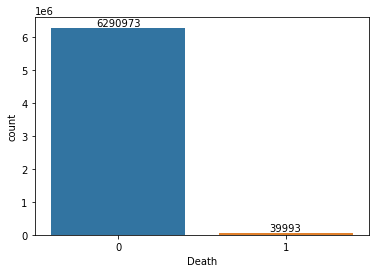

In [18]:
ax = sns.countplot(df2['Death']);
abs_values = df2['Death'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.show()

In [19]:
df2['Date Symptoms'].value_counts()

2022-01-10    133732
2022-01-17    104748
2022-01-11     98522
2022-01-12     94019
2022-01-18     88918
               ...  
2022-10-29      3230
2022-04-14      3203
2022-12-24      2292
2022-12-25      1382
2022-12-26       865
Name: Date Symptoms, Length: 360, dtype: int64

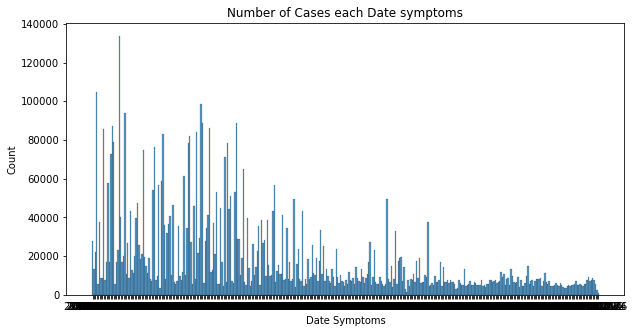

In [61]:
plt.figure(figsize=(10,5))
sns.histplot(x=df2['Date Symptoms'])
plt.title("Number of Cases each Date symptoms");

bar chart of date symptoms
then stacking chart on positive vs negative 

In [20]:
df2['Age'].value_counts()

28     162414
27     160833
30     160585
29     160056
31     155322
        ...  
135         1
130         1
137         1
266         1
164         1
Name: Age, Length: 128, dtype: int64

In [21]:
df2['Age'].value_counts(ascending=True).head(20)

164     1
135     1
266     1
137     1
130     1
118     7
121     7
116     7
120     9
117    10
113    11
114    13
119    14
115    21
112    25
111    31
110    34
107    53
109    57
106    75
Name: Age, dtype: int64

looking at various news articles, the oldest men and women across the world were recorded to be about 110s-120s

Mexico Life expectancy is about 77-78 years 

In [22]:
df2=df2[df2['Age']<130]

In [23]:
df2['Age'].value_counts(ascending=True)

118         7
116         7
121         7
120         9
117        10
        ...  
31     155322
29     160056
30     160585
27     160833
28     162414
Name: Age, Length: 123, dtype: int64

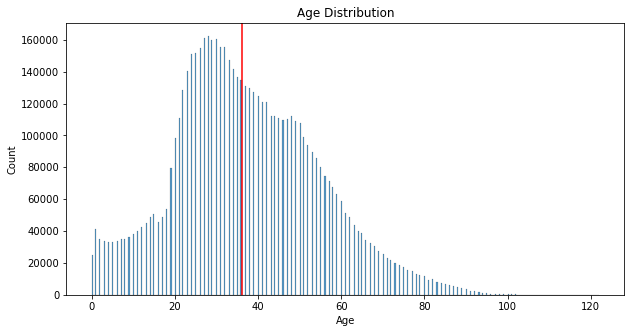

In [24]:
plt.figure(figsize=(10,5))
sns.histplot(x=df2['Age'])
plt.axvline(df2['Age'].median(), color='red')
plt.title("Age Distribution");

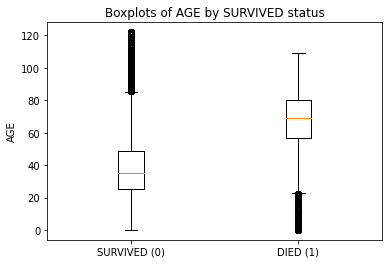


Mean age of all patients: 37.3 years

Mean age of those who survived: 37.1 years

Mean age of those who died: 66.1 years


In [25]:
# Boxplots of AGE by SURVIVED status
AGE_SURVIVED = df2[df2.Death == 0].Age
AGE_DIED = df2[df2.Death == 1].Age
plt.boxplot(x=[AGE_SURVIVED, AGE_DIED], labels=['SURVIVED (0)', 'DIED (1)'])
plt.ylabel("AGE")
plt.title("Boxplots of AGE by SURVIVED status")
plt.show()

# Mean age for each group
print("\nMean age of all patients: {} years".format(round(sum(df2.Age) / 
                                                    len(df2.Age), 1)))
print("\nMean age of those who survived: {} years".format(round(sum(df2[df2.Death == 0].Age) /   
                                                                len(df2[df2.Death == 0].Age), 1)))
print("\nMean age of those who died: {} years".format(round(sum(df2[df2.Death == 1].Age) / 
                                                    len(df2[df2.Death == 1].Age), 1)))

In [51]:
# Check how many people actually tested positive
percent_positive = round(sum(df2['COVID'] < 4) / len(df2['COVID']), 3) * 100
print("{}% of patients tested positive for COVID in the original dataset.".format(percent_positive))

# Only 37% of patients tested positive. Only keep these patients in the data
positive = df2[df2['COVID'] < 4]
print(positive.shape)


49.6% of patients tested positive for COVID in the original dataset.
(3138713, 36)


In [52]:
# Rename DATE_DIED as SURVIVED
#train_COVID.rename(columns={'DATE_DIED': 'SURVIVED'}, inplace=True)

# Number of people who survived / died and their percentages
survived = sum(df2['Death'] == 0)
survived_percent = round(survived / len(df2['Death']), 3) * 100
died = sum(df2['Death'] == 1)
died_percent = round(died /len(df2['Death']), 3) * 100

print("{} people ({}%) survived COVID-19 infection.".format(survived, survived_percent))
print("{} people ({}%) died of COVID-19 infection.".format(died, died_percent))

6290968 people (99.4%) survived COVID-19 infection.
39993 people (0.6%) died of COVID-19 infection.


In [ ]:
Age and dead

In [62]:
x = 
y1 =
y2 = 

plt.bar(x,y1, color='r')
plt.bar(x,y2,bottom=y1,color='b')
plt.show()

TypeError: bar() got multiple values for argument 'x'

In [ ]:
corr=df.corr()
corr.style.backgound_gradient(cmap='coolwarm')

In [ ]:
#Find out if a patient is high risk or not
hr=df[

In [ ]:
hr.head()

In [17]:
for col in df2:
    print(df2[col].unique())

['10e0db' '0989f5' '01e27d' ... 'm123829' 'm0610a9' 'm0f4634']
[1 2]
[12  9  3  6  8 10  7 11  1  4  5 13  2 99]
[20 14 25  9 23  7 15 22 17 16 18  2 12  3 10 24  5 21 27 28  8 26 19  1
 32 11 30  4 31 13  6 29]
[2 1]
[20 14 25  9 23  7 15 22 17 16 18  2 12  3 10 24  5 21 27 28  8 26 19  1
 32 11 30  4  6 31 13 29]
[ 67  71   1  12  10   8   7  60   2  14  35   4  33  15  16   6  29   3
   5  59  28  49  13  19  37  30   9  66  32  18  46  57  58  56 515  53
  22 120  42  25  17 109  21  62  26  89  41  20  34 413 324 375 104  11
 114 101 155 193  65 184  52 122 156  24  77  76  40 112  55  68 115  38
 102  31  88 108 121  48  39  99  97 134  86  23 177 119  27  70 106  79
  45  44  50 417  51  95  87 338  81  43 138  36  63  93 118  83 174  98
  69 157 208 133 105  54 140 100 103  94 385 483 164  75 107 113  82 379
  74  85  96 207 327 163 397 178 183 204 132 189 110  91 294 293 187 390
  47 211  90 175 137 530 131 124 116 318  92 482 232 227 141 170 154 234
 169 126 551 565  64  84 2

['9999-99-99' '2022-02-21' '2022-09-10' '2022-01-12' '2022-01-03'
 '2022-01-01' '2022-01-02' '2022-01-04' '2022-01-06' '2022-01-26'
 '2022-01-11' '2022-01-05' '2022-02-28' '2022-02-16' '2022-01-08'
 '2022-01-21' '2022-01-10' '2022-01-15' '2022-02-09' '2022-01-13'
 '2022-01-09' '2022-01-07' '2022-02-11' '2022-01-18' '2022-01-23'
 '2022-04-11' '2022-01-14' '2022-01-17' '2022-01-20' '2022-01-16'
 '2022-02-17' '2022-01-25' '2022-01-19' '2022-01-22' '2022-02-13'
 '2022-02-02' '2022-01-31' '2022-02-01' '2022-01-24' '2022-01-27'
 '2022-01-29' '2022-01-30' '2022-02-04' '2022-02-24' '2022-02-12'
 '2022-01-28' '2022-02-14' '2022-02-05' '2022-02-03' '2022-02-07'
 '2022-02-06' '2022-03-04' '2022-02-08' '2022-02-19' '2022-02-10'
 '2022-02-22' '2022-02-15' '2022-03-03' '2022-03-18' '2022-03-08'
 '2022-03-19' '2022-05-08' '2022-03-13' '2022-02-20' '2022-02-23'
 '2022-02-26' '2022-03-10' '2022-03-05' '2022-04-02' '2022-03-09'
 '2022-03-01' '2022-03-12' '2022-02-18' '2022-03-07' '2022-05-18'
 '2022-03-

In [16]:
for c in df2.columns:
   if len(df2[c].unique()) >= 3 and len(df2[c].unique()) <=10:
        print(df2[c].value_counts(normalize=True))

97    0.959521
2     0.038711
1     0.001737
99    0.000031
Name: Intubated, dtype: float64
2     0.972857
1     0.016839
99    0.010304
Name: Pneumonia, dtype: float64
2     0.547050
97    0.433519
1     0.013215
98    0.006215
99    0.000002
Name: Pregnant, dtype: float64
2     0.932837
99    0.062511
1     0.004653
Name: Language, dtype: float64
2     0.932412
99    0.061127
1     0.006461
Name: Indigenous, dtype: float64
2     0.936805
1     0.059159
98    0.004035
Name: Diabetes, dtype: float64
2     0.990699
1     0.005363
98    0.003937
Name: COPD, dtype: float64
2     0.977628
1     0.018456
98    0.003916
Name: Asthma, dtype: float64
2     0.990965
1     0.005113
98    0.003922
Name: Immunosuppresed, dtype: float64
2     0.912628
1     0.083453
98    0.003919
Name: Hypertension, dtype: float64
2     0.973397
98    0.015832
1     0.010770
Name: Other Disease, dtype: float64
2     0.987941
1     0.008136
98    0.003923
Name: Cardiovascular, dtype: float64
2     0.937888
1     0.